In [1]:
from cloudpathlib import AnyPath
from eosets.pair import Pair
from eoreader.bands import NBR
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"), log_lvl=logging.INFO)
logs.init_logger(logging.getLogger("eosets"))

In [3]:
# Get the base paths
data_path = AnyPath(r"/home/ds2_db3/CI/eosets/DATA")

In [4]:
# Get a dictionary of Sentinel-2, Sentinel-3 and Landsat-8 reference and secondary images
s2_paths = {
    "reference_paths": [data_path / "S2A_MSIL1C_20200824T110631_N0209_R137_T29TQE_20200824T150432.zip"],
    "secondary_paths": [data_path / "S2B_MSIL1C_20200908T110619_N0209_R137_T29TQE_20200908T132324.zip"],
}

s3_paths = {
    "reference_paths": [data_path / "S3B_SL_1_RBT____20200824T105515_20200824T105815_20200825T151744_0179_042_322_2340_LN2_O_NT_004.SEN3"],
    "secondary_paths": [data_path / "S3B_SL_1_RBT____20200909T104016_20200909T104316_20200910T161910_0179_043_165_2340_LN2_O_NT_004.SEN3"],
}

l8_paths = {
    "reference_paths": [data_path / "LC08_L1TP_202032_20200828_20200906_02_T1.tar"],
    "secondary_paths": [data_path / "LC08_L1TP_202032_20200929_20201006_02_T1.tar"],
}

all_paths = [s2_paths, s3_paths, l8_paths]

aoi_path = data_path / "Fire_Spain.geojson"

2024-04-25 13:54:46,683 - [DEBUG] - *** Loading ['NBR'] for 20200824T110631_S2_T29TQE_L1C_150432 ***


2024-04-25 13:54:50,725 - [DEBUG] - Merging bands NBR


2024-04-25 13:54:50,835 - [DEBUG] - Collocating bands


2024-04-25 13:54:50,839 - [DEBUG] - *** Loading ['NBR'] for 20200908T110619_S2_T29TQE_L1C_132324 ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2024-04-25 13:54:53,442 - [DEBUG] - Merging bands NBR


2024-04-25 13:54:53,544 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


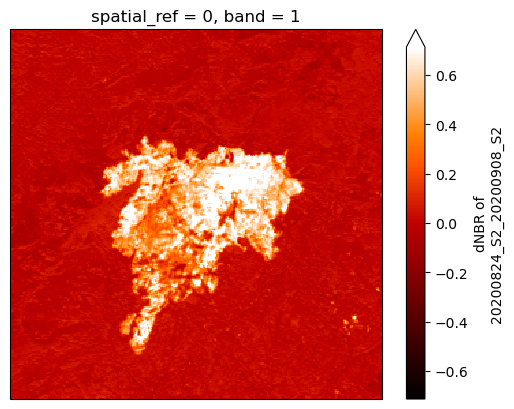

2024-04-25 13:55:10,929 - [DEBUG] - *** Loading ['NBR'] for 20200824T105515_S3_SLSTR_RBT ***


2024-04-25 13:55:33,274 - [DEBUG] - Merging bands NBR


2024-04-25 13:55:33,376 - [DEBUG] - Collocating bands


2024-04-25 13:55:33,380 - [DEBUG] - *** Loading ['NBR'] for 20200909T104016_S3_SLSTR_RBT ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2024-04-25 13:56:00,657 - [DEBUG] - Merging bands NBR


2024-04-25 13:56:00,762 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


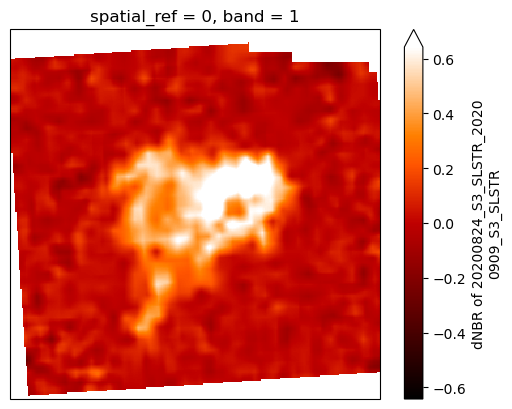

2024-04-25 13:56:08,953 - [DEBUG] - *** Loading ['NBR'] for 20200828T110153_L8_202032_OLI_TIRS ***


2024-04-25 13:56:10,953 - [DEBUG] - Merging bands NBR


2024-04-25 13:56:11,144 - [DEBUG] - Collocating bands


2024-04-25 13:56:11,150 - [DEBUG] - *** Loading ['NBR'] for 20200929T110204_L8_202032_OLI_TIRS ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2024-04-25 13:56:12,783 - [DEBUG] - Merging bands NBR


2024-04-25 13:56:12,948 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


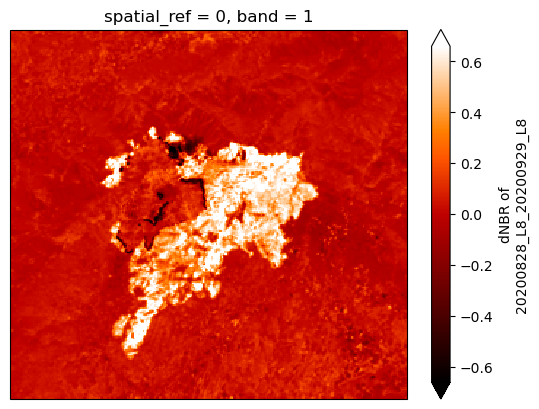

In [5]:
for paths in all_paths:
    # Create pair with reference and secondary paths
    pair = Pair(**paths)

    # Load dNBR
    _, _, dnbr_ds = pair.load(
        diff_bands=NBR,
        window=aoi_path,
        pixel_size=60
    )
    dnbr = dnbr_ds[NBR]
    dnbr.attrs["long_name"] = f"dNBR of {pair.condensed_name}"

    # Plot the pairs
    crs = ccrs.UTM(str(dnbr.rio.crs.to_epsg())[-2:])
    dnbr.plot(
        robust=True,
        transform=crs,
        x="x",
        y="y",
        cmap="gist_heat",
        subplot_kws={'projection':crs}
    )
    plt.show()

In [6]:
pair = Pair(**s2_paths)
stack = pair.stack(
    reference_bands=NBR,
    secondary_bands=NBR,
    diff_bands=NBR,
    window=aoi_path,
    pixel_size=60
    )
stack

2024-04-25 13:56:16,780 - [DEBUG] - *** Loading ['NBR'] for 20200824T110631_S2_T29TQE_L1C_150432 ***


2024-04-25 13:56:20,859 - [DEBUG] - Merging bands NBR


2024-04-25 13:56:21,018 - [DEBUG] - Collocating bands


2024-04-25 13:56:21,026 - [DEBUG] - *** Loading ['NBR'] for 20200908T110619_S2_T29TQE_L1C_132324 ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2024-04-25 13:56:24,587 - [DEBUG] - Merging bands NBR


2024-04-25 13:56:24,700 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


<xarray.DataArray 'Reference_NBR_Secondary_NBR_dNBR' (bands: 3, y: 271, x: 272)> Size: 885kB
dask.array<transpose, shape=(3, 271, 272), dtype=float32, chunksize=(1, 271, 272), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 2kB 7.705e+05 7.706e+05 ... 7.867e+05 7.868e+05
  * y            (y) float64 2kB 4.458e+06 4.458e+06 ... 4.442e+06 4.442e+06
    spatial_ref  int64 8B 0
  * bands        (bands) object 24B MultiIndex
  * variable     (bands) object 24B 'Reference_NBR' 'Secondary_NBR' 'dNBR'
  * band         (bands) int64 24B 1 1 1
Attributes:
    long_name:       Reference_NBR Secondary_NBR dNBR
    condensed_name:  20200824_S2_20200908_S2

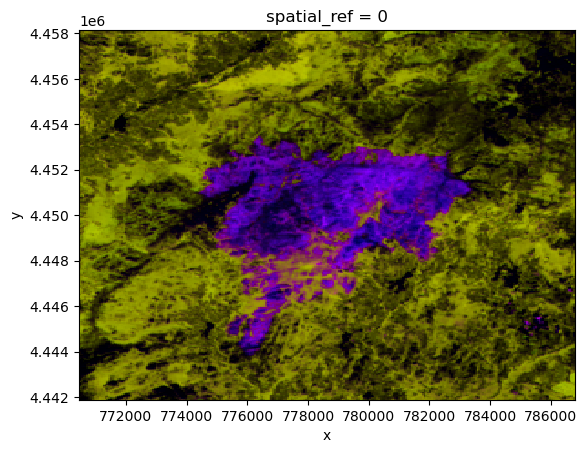

In [7]:
stack.plot.imshow(vmin=0, vmax=1, robust=True)